<h1> NLP and the Web - WS 21/22: Home Exercise 3</h1>

<h3>General Information</h3>
<br>
We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle and we will try to help you out. <br><br>
We provide type hints for function parameters and return values of functions that you have to implement in the tasks. These are suggestions only, and you may use different types if you prefer. As long as you produce the required output in a coherent and understandable way, you can get full points. <br><br>
We use the term 'array-like object' to loosely refer to collection types like lists, arrays, maps, dataframes, etc.

<h2>Task 1: Hidden Markov Models - 10 Points </h2>

In this task, you will be able to perform part-of-speech tagging by yourself using Hidden Markov Models.
Part-of-speech tagging (POS tagging) is the process assigning a syntactic label to each token in a document. This
kind of tagging gives us more information about surrounding words, e.g. adjectives occur more often before a noun and
after a determiner and verbs appear usually after a noun. As an example, here we have two sentences:<br><br>
"Time flies like an arrow."<br>
"Fruit flies ate a banana"

A tokenizer would split them into the following tokens:

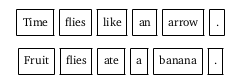

A part-of-speech tagger (spaCy tagger) could then assign labels, or <b>tags</b>, to the tokens according to their respective parts
of speech:

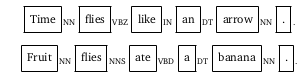

Hidden Markov Models (HMMs): are graphical probabilistic models that enable us to talk about observed and hidden
events. The latter being considered as causal factors in the model (Jurafky & Martin, 2019). For instance, in our real
world we can see words but we cannot see pos-tags. Given the explanation of HMMs in the lecture and in our lab session,
we will find the best pos sequence for a given word sequence using the Bayes’ Rule and the Viterbi Algorithm, please
refer to slides from both Lecture and Lab session for further details.<br><br>
<b>Note:</b> For this exercise, you may only use spaCy, scikit-learn, NumPy, Pandas and internal packages from Python. Please
follow the instructions as given below and in case of questions use our Discussion forum in Moodle, we don’t answer
questions via email.
<br>
<br>
Using the files <i>transisition_probabilities.csv</i> and <i>observation_likelihoods.csv</i>, compute the likelihood of POS tags for the
following word sequence:

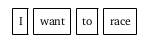

<i>Please use comments where appropriate to help tutors understand your code.</i>

<h3>Task 1.1 - 4 points</h3>

Load the given files and:

In [2]:
from typing import List, Tuple
import pandas as pd

# Load CSV files
observation_likelihood = pd.read_csv('observation_likelihoods.csv')
transition_probability = pd.read_csv('transisition_probabilities.csv')

# Assign labels for better readability
observation_likelihood.columns = ['Tags', ' I', ' want', ' to ', ' race']
transition_probability.columns = ['Tags', 'VB', 'TO', 'NN', 'PPSS']

print(transition_probability)
print(observation_likelihood)

   Tags      VB       TO       NN     PPSS
0   <s>  0.0190  0.00430  0.04100  0.06700
1    VB  0.0038  0.03500  0.04700  0.00700
2    TO  0.8300  0.00000  0.00047  0.00000
3    NN  0.0040  0.01600  0.08700  0.00450
4  PPSS  0.2300  0.00079  0.00120  0.00014
   Tags     I      want   to      race
0    VB  0.00  0.009300  0.00  0.00012
1    TO  0.00  0.000000  0.99  0.00000
2    NN  0.00  0.000054  0.00  0.00057
3  PPSS  0.37  0.000000  0.00  0.00000


a) Write a function to obtain a list of all possible tag sequences for the word sequence given above and store them in a list. Print the first 5 tag sequences as well as the total number of sequences. <br>
<b>Note</b>: We do not consider the observation and transition probabilities yet. Tags can appear multiple times in a sequence.

In [17]:
import itertools

def calculate_tag_permutations(observations: pd.DataFrame) -> List[Tuple[str, ...]]:
    """
    Calculates an array-like object of all possible tag permutations for the token sequence
    
    :param observations: array-like object of tokens and tag probabilities
    :return: array-like object of all tag permutations
    """
    return list(itertools.product(observations['Tags'], repeat=len(observations)))
all_tag_seq=calculate_tag_permutations(observation_likelihood)
print(all_tag_seq[:5])
print(len(all_tag_seq))
    

[('VB', 'VB', 'VB', 'VB'), ('VB', 'VB', 'VB', 'TO'), ('VB', 'VB', 'VB', 'NN'), ('VB', 'VB', 'VB', 'PPSS'), ('VB', 'VB', 'TO', 'VB')]
256


b) Implement the Hidden Markov Model (HMM) discussed in the lecture and use it to assign a probability to each possible sequence. Print the most likely tag sequence and its probability 

In [22]:
import operator


def calculate_sequence_probability(sequence: List[str], 
                                   observations: pd.DataFrame, transitions: pd.DataFrame) -> float:
    """
    Calculates a probability for a token sequence using the Hidden Markov Model
    
    :param sequences: array-like object of POS tag sequences
    :param observations: array-like object of observation probabilities
    :param transitions: array-like object of transition probabilities
    :return: Probability of the POS sequence
    """
    #print(sequence)
    sent=observation_likelihood.columns[1:]
    #print(sent)
    for num,token in enumerate(sequence):
        #print("num,token:",num,token)
        if num==0:
            pro=float(transitions[token][num]*observations[sent[num]][observations['Tags']==token])
        else:
            last=sequence[num-1]
            pro=pro*float(transitions[token][transitions['Tags']==last])*float(observations[sent[num]][observations['Tags']==token])
    return pro
                                                                                      
            

    
#calculate_sequence_probability(all_tag_seq[18],observation_likelihood,transition_probability)



In [23]:
def score_tag_sequences(sequences: List[List[str]], 
                        observations: pd.DataFrame, 
                        transitions: pd.DataFrame) -> List[Tuple[Tuple[str, ...], float]]:
    """
    Calculate the sequences probability for every entry in an array-like object of POS sequences
    
    :param sequences: array-like object of POS tag sequences
    :param observations: array-like object of observation probabilities
    :param transitions: array-like object of transition probabilities
    :return: array-like object that contains a POS sequence and a probability for every entry
    """
    all_tag_pro=[]
    for i in sequences:
        line=[]
        pro=calculate_sequence_probability(i,observation_likelihood,transition_probability)
        line.append(i)
        line.append(pro)
        all_tag_pro.append(line)
        
    return all_tag_pro


def find_sequence_with_highest_probability(
    scored_sequences: List[Tuple[Tuple[str, ...], float]]) -> Tuple[Tuple[str, ...], float]:
    """
    Returns the POS tag sequence and probability with the highest probability from an array-like object that contains a POS sequence and a probability for every entry
    
    :param scored_sequences: array-like object that contains a POS sequence and a probability for every entry
    :return: Tuple of sequence and probability 
    """
    best=0
    sent=[]
    for i in scored_sequences:
        if i[1]>=best:
            best=i[1]
            sent=i[0]
    return (sent,best)

scored_sequences=score_tag_sequences(all_tag_seq,observation_likelihood,transition_probability) 
find_sequence_with_highest_probability(scored_sequences) 

(('PPSS', 'VB', 'TO', 'VB'), 1.8299949392340002e-10)

c) Why would the naive solution of scoring each tag sequence not scale up to real world problems ? How does the Viterbi algorithm relate to that ? Discuss in up to 3 sentences

**Answer:** The naive solution essentially is a brute force search with high complexicity $O(s^m)$, where $m$ is the length of the input and $s$ is the number of states in the model. In the contrast, the complexicity of Viterbi algorithm is $O(ms^2)$

<h3>Task 1.2 - 6 points</h3>

Implement the Viterbi algorithm as shown in slide 23 of our Exercise Session 3 and apply it to the data from above:

a) Compute the initialization step of Viterbi given transition and observation probability and print the probability matrix

In [18]:
import numpy as np
T=len(observation_likelihood.columns)-1
N=len(transition_probability)-1
viterbi=np.zeros([N,T])
backpointer=np.empty([N,T])
for j in range(N):
    viterbi[j,0]=transition_probability.iloc[0][j+1]*observation_likelihood.iloc[j][1]
print(viterbi)    

[[0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.02479 0.      0.      0.     ]]


b) Compute the recursion step of Viterbi given transition and observation probability and print the probability matrix again

In [7]:
compare=np.empty(4)

for t in range(2,T+1):
    #print("t=",t)
    for s in range(N):
        #print("s=",s)
        for i in range(N):
            #print("i=",i)
            compare[i]=viterbi[i,t-2]*transition_probability.iloc[i+1][s+1]*observation_likelihood.iloc[s][t]
            #print(viterbi[i,t-2],transition_probability.iloc[i+1][s+1],observation_likelihood.iloc[s][t])
        #print("compare:",compare)
        viterbi[s,t-1]=np.max(compare)
        
print(viterbi)



[[0.00000000e+00 5.30258100e-05 0.00000000e+00 1.82999494e-10]
 [0.00000000e+00 0.00000000e+00 1.83734432e-06 0.00000000e+00]
 [0.00000000e+00 1.60639200e-09 0.00000000e+00 4.92224542e-13]
 [2.47900000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


c) Compute the termination step of Viterbi given transition and observation probability. Afterwards, print the most likely tag sequence and its probability like you did in 1.1 a).

In [8]:
best_path=[]
seq=[]
loc=np.argmax(viterbi,axis=0)
prob=np.max(viterbi[:,N-1])
for i in loc:
    best_path.append(observation_likelihood.iloc[i][0])
seq.append(tuple(best_path))
seq.append(prob)
print(seq)



[('PPSS', 'VB', 'TO', 'VB'), 1.8299949392340002e-10]


<h2>Task 2: Vectorizing and ML with scikit-learn - 10 Points </h2>

Text classification is the task of categorizing text data into a set of predefined labels. The most important part of text classification is feature engineering: the process of extracting features from raw text data for machine learning models. We discussed previously what is a bag of words (bow) and why is it important to use it. In today’s class, we have seen how to transform a raw text into a set of features that can be represented as a matrix or a vector. In this exercise, we will practice feature engineering for text classification with <a href="https://scikit-learn.org/stable/">scikit-learn</a>. The goal of this exercise is to explore different features and their representations, train and evaluate different classifiers to automatically identify the sentiment polarity of the movie reviews.<br><br>
<b>Data:</b> The dataset provided for this exercise contains 5k movie reviews with positive and negative labels, which were taken from IMDB Dataset. It's saved in the file *IMDB_reviews.csv*, which has two columns separated by ','. The first column contains reviews and the second column contains their sentiment labels (0=negative, 1=positive). <br><br>
<b>Note:</b> For this task, you may only use spaCy, scikit-learn, NumPy, Pandas and internal packages from Python. Please follow the instructions as given below and in case of questions use our Discussion forum in Moodle, we don’t answer questions via email.<br><br>
Please use comments where appropriate to help tutors understand your code. 

<h3> Task 2.1 - 5 Points </h3>

**a)** Read the data from *IMDB_reviews.csv*. Shuffle and split it into training (60%), development (20%) and test(20%) sets. Print the size of the training, development and test set.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("IMDB_reviews.csv", sep=",")
display(data)
                   
text_train, text_dev_test, label_train, label_dev_test = train_test_split(data['text'], data['label'], 
                                                                  test_size=0.40, 
                                                                  random_state=42, shuffle=True)#6：4 get train data and rest data.

text_dev, text_test, label_dev, label_test = train_test_split(text_dev_test, label_dev_test, 
                                                                  test_size=0.50, 
                                                                  random_state=42, shuffle=True)# 1:1 devide rest data into development and test data.

print("the size of the training: set:",len(text_train),'\n')
print("the size of the development set:",len(text_dev),'\n')
print("the size of the test set:",len(text_test),'\n')





,text,label
0,The first and only time I saw the woman in bla...,1
1,Just don't bother. I thought I would see a mov...,0
2,This movie is just bad. Bad. Bad. Bad. Now tha...,0
3,"First, This movie was made in 1978. So that te...",0
4,"You know all those letters to ""Father Christma...",0
...,...,...
4995,"Deliverance is the fascinating, haunting and s...",1
4996,"I saw this one at Sundance, and I can't figure...",0
4997,I watched this movie knowing that it would be ...,0
4998,Having enjoyed Koyaanisqatsi and Powaqatsi I w...,0


the size of the training: set: 3000 

the size of the development set: 1000 

the size of the test set: 1000 



**b)** Implement the function `train_valid_cls()`. The function should take the training and development set as well as a vectorizer and a classifier as shown below. The function should then train and validate the given classifier using the data and the vectorizer and print the accuracy on the development set.
<br>
Using `train_valid_cls()` together with the `CountVectorizer()` and the `MultinomialNB()` provided by scikit-learn, train and evaluate two multinomial Naive Bayes classifiers with the training and development sets. One classifier uses the count matrix (absolute occurrence of each word) and the other one uses the binary count matrix (binary, whether a word occurs in a text) as features. Print the accuracy of each classifier.

In [10]:
# Imports
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

def train_valid_cls(train_texts: pd.Series, train_labels: pd.Series, dev_texts: pd.Series, dev_labels: pd.Series, 
                    vectorizer: CountVectorizer, classifier: MultinomialNB) -> None:
    """
    Train and validate the classifier with the given data and vectorizer, print the accuracy of 
    the trained classifier on the development set.
    
    @param train_texts: array-like object containing review texts from the training set
    @param train_labels: array-like object with corresponding sentiment labels for train_texts
    @param dev_texts: array-like object containing review texts from the development set
    @param dev_labels: array-like object with corresponding sentiment labels for dev_texts
    @param vectorizer: a customized scikit-learn Vectorizer 
    @param classifier: a scikit-learn Classifier
    """
    train_texts_counts=vectorizer.fit_transform(train_texts) # vectorize the train data
    dev_texts_counts=vectorizer.transform(text_dev)# vectorize the development data
    classifier.fit(train_texts_counts,train_labels)# train the model
    pred=classifier.predict(dev_texts_counts)    # use model to predict the development data
    print("Acc:",metrics.accuracy_score(dev_labels,pred))
    

In [11]:
train_valid_cls(text_train,label_train, text_dev, label_dev, CountVectorizer(lowercase=True), MultinomialNB())
train_valid_cls(text_train,label_train, text_dev, label_dev, CountVectorizer(lowercase=True,binary=True), MultinomialNB())

Acc: 0.819
Acc: 0.828


**c)** Using the function `train_valid_cls()` from b), explore at least 3 different ranges of n-grams (introduce bigram, trigram ... features) and try to find the best one for training the multinomial Naive Bayes classifier with count matrix or binary count matrix. Report the accuracy on the development set for every range you tried.

In [12]:
n_gram=[(2,2),(3,3),(4,4)]
for gram in n_gram:
    print("The accuracy on count matrix under the grams ",gram)
    train_valid_cls(text_train,label_train, text_dev, label_dev, CountVectorizer(lowercase=True,ngram_range=gram), MultinomialNB())# ngram_range(a,b) means that from a to b as a group to vectorize  
    print("The accuracy on binary count under the grams ",gram)
    train_valid_cls(text_train,label_train, text_dev, label_dev, CountVectorizer(lowercase=True,ngram_range=gram,binary=True), MultinomialNB())

The accuracy on count matrix under the grams  (2, 2)
Acc: 0.849
The accuracy on binary count under the grams  (2, 2)
Acc: 0.852
The accuracy on count matrix under the grams  (3, 3)
Acc: 0.819
The accuracy on binary count under the grams  (3, 3)
Acc: 0.821
The accuracy on count matrix under the grams  (4, 4)
Acc: 0.741
The accuracy on binary count under the grams  (4, 4)
Acc: 0.744


**Answer:** As the results shown above, the best perfamance is bigrams. the accuarcies for both matrix ,count matrix and binary count matrix, are the highest.

<h3> Task 2.2 - 5 Points </h3>

**a)** Tokenize every review text in the training and development sets using spaCy (It may take a few minutes). You should store the tokens as spaCy token objects (instead of strings) for the subsequent tasks

In [13]:
import spacy
from spacy.lang.en import English

nlp = English()
nlp = spacy.load('en_core_web_sm')
train_text_doc=[]
dev_text_doc=[]
for tx in text_train:
    train_text_doc.append(nlp(tx))# tokenize every review text in the training 
for tx in text_dev:
    dev_text_doc.append(nlp(tx))# tokenize every review text in the development 


**b)** Extract the spaCy word vectors of the tokens from a). For each review text, calculate the average of all word vectors as its vector representation. Then train a gaussian Naive Bayes classifier (sklearn.naive_bayes.GaussianNB) with the obtained vector representations, evaluate and print its accuracy on the development set.

In [14]:
from sklearn.naive_bayes import GaussianNB
train_vector=[]
dev_vector=[]
for review in train_text_doc:
    train_vector.append(review.vector)  # calculate the average of all word vectors 
    
for review in dev_text_doc:
    dev_vector.append(review.vector)


In [15]:
classifier_G=GaussianNB()
classifier_G.fit(train_vector,label_train)
pred=classifier_G.predict(dev_vector)
print("Acc:",metrics.accuracy_score(label_dev,pred))

Acc: 0.619


**c)** Now, filter out all tokens except verbs, adjectives and adverbs from the tokenized review texts from a). You should store the remaining tokens as spaCy token objects (instead of strings). 
Extract the spaCy word vectors of the remaining tokens and create a vector representation of each review text like you did in b). Then you should again train and evaluate a GaussianNB classifier and print its accuracy on the development set.

In [20]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern_attr1 = [{'POS': 'ADJ'}]
pattern_attr2 = [{'POS': 'VERB'}]
pattern_attr3 = [{'POS': 'ADV'}]
matcher.add('PATTERN_ATTR', [pattern_attr1])
matcher.add('PATTERN_ATTR', [pattern_attr2])
matcher.add('PATTERN_ATTR', [pattern_attr3])

train_token=[]
for review in train_text_doc:
    matches=matcher(review) # only get verbs, adjectives and adverbs from every tokenized review text
    tokens=[]
    for match_id, start, end in matches:
        tokens.append(review[start:end].text) # store the data that have been filted out
    train_token.append(nlp(str(tokens)))

dev_token=[]
for review in dev_text_doc:
    matches=matcher(review)
    tokens=[]
    for match_id, start, end in matches:
        tokens.append(review[start:end].text)
    dev_token.append(nlp(str(tokens)))

train_token_vector=[]
dev_token_vector=[]
for review in train_token:
    train_token_vector.append(review.vector)  # vectorize the filted data      
for review in dev_token:
    dev_token_vector.append(review.vector)

classifier_G.fit(train_token_vector,label_train)
pred=classifier_G.predict(dev_token_vector)
print("Acc:",metrics.accuracy_score(label_dev,pred))

Acc: 0.589


**d)** Choose your best model from Task 2.1 and Task 2.2 and test it on the test set, print the accuracy. Why is it important to evaluate your final model on a previously unused test set? Explain it in up to 2 sentences.

In [21]:
test_text_doc=[]
test_vector=[]
print("bigrams for multinomial Naive Bayes classifier with count binary:")
train_valid_cls(text_train,label_train, text_test, label_test, CountVectorizer(lowercase=True,ngram_range=(2,2),binary=True), MultinomialNB())
print("calculate the average of all word vectors and train a gaussian Naive Bayes classifier:")
for tx in text_test:
    test_text_doc.append(nlp(tx))
for review in test_text_doc:
    test_vector.append(review.vector)
classifier_G.fit(train_vector,label_train)
pred=classifier_G.predict(test_vector)
print("Acc:",metrics.accuracy_score(label_test,pred))

bigrams for multinomial Naive Bayes classifier with count binary:
Acc: 0.493
calculate the average of all word vectors and train a gaussian Naive Bayes classifier:
Acc: 0.638


Please upload in Moodle your working Jupyter-Notebook <b>before next the lab session</b> <span style="color:red">(Dec 9th, 16:14)</span>. Submission format: Group_No_Exercise_No.zip<br>
Submission should contain your filled out Jupyter notebook template (naming schema: Group_No_Exercise_No.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us).<br>
Each submission must only be handed in once per group.